## Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [2]:
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam.csv


In [3]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df.head(2)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN


In [4]:
to_drop = ['Unnamed: 2','Unnamed: 3','Unnamed: 4']
df = df.drop(df[to_drop], axis=1)
df.head(3)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [5]:
df.rename(columns={'v1':'label','v2':'text'}, inplace=True)
df[0:5]

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


## Feature Engineering
We will create two features :-
1. Text length
2. Punctuation usage

In [7]:
df['text_length'] = df['text'].apply(len)
df.head(4)

,label,text,text_length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49


In [8]:
import string
def punc_count(txt):
  count = sum([1 for c in txt if c in string.punctuation])
  return (count/len(txt))*100

In [9]:
df['punc_%'] = df['text'].apply(lambda x: punc_count(x))
# df['punc_%'] = df['text'].apply(punc_count) - same thing as above line
df.head(4)

,label,text,text_length,punc_%
0,ham,"Go until jurong point, crazy.. Available only ...",111,8.108108
1,ham,Ok lar... Joking wif u oni...,29,20.689655
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,3.870968
3,ham,U dun say so early hor... U c already then say...,49,12.244898


In [12]:
import matplotlib.pyplot as plt

In [25]:
print(f'ham = {len(df[df["label"]=="ham"])}')
print(f'spam = {len(df[df["label"]=="spam"])}')

ham = 4825
spam = 747


In [26]:
print(f"Numbers of missing label = {df['label'].isnull().sum()}")

Numbers of missing label = 0


In [28]:
print(f"Numbers of missing text = {df['text'].isnull().sum()}")

Numbers of missing text = 0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7faa6052bc10>,
      dtype=object)

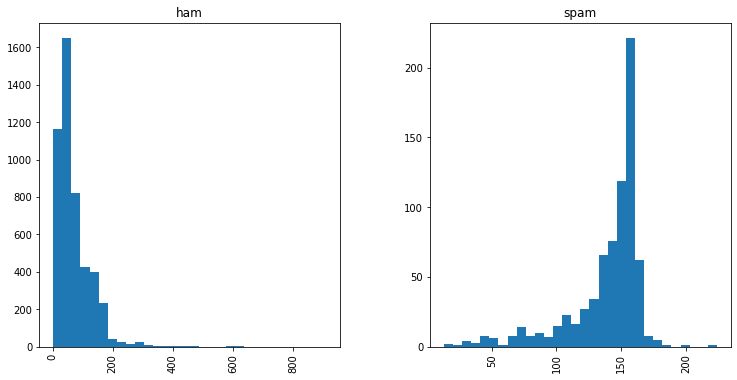

In [30]:
df.hist(column='text_length',by='label',bins=30,figsize=(12,6))

## Removing Punctuation

In [41]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [42]:
df[0:4]

,label,text,text_length,punc_%
0,ham,"Go until jurong point, crazy.. Available only ...",111,8.108108
1,ham,Ok lar... Joking wif u oni...,29,20.689655
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,3.870968
3,ham,U dun say so early hor... U c already then say...,49,12.244898


In [48]:
def remove_punc(txt):
  txt_nopunc = ''.join([i for i in txt if i not in string.punctuation])
  return txt_nopunc

In [49]:
df['clean_text'] = df['text'].apply(remove_punc)
df.head(4)

,label,text,text_length,punc_%,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,8.108108,Go until jurong point crazy Available only in ...
1,ham,Ok lar... Joking wif u oni...,29,20.689655,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,3.870968,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,49,12.244898,U dun say so early hor U c already then say


## Tokenization

In [50]:
import re

In [51]:
def tokenize(txt):
  tokens = re.split('\W+',txt) # W means non-word characters and + means one or more
  return tokens

In [53]:
df['tokenized_clean_text'] = df['clean_text'].apply(lambda x: tokenize(x.lower()))

In [54]:
df.head(4)

,label,text,text_length,punc_%,clean_text,tokenized_clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,8.108108,Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,29,20.689655,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,3.870968,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,U dun say so early hor... U c already then say...,49,12.244898,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."


## Removing StopWords

In [55]:
import nltk

In [57]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [58]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [59]:
def remove_stopwords(txt):
  clean_msg = [word for word in txt if word not in stopwords]
  return clean_msg

In [60]:
df['text_no_stopword'] = df['tokenized_clean_text'].apply(remove_stopwords)
df.head(4)

,label,text,text_length,punc_%,clean_text,tokenized_clean_text,text_no_stopword
0,ham,"Go until jurong point, crazy.. Available only ...",111,8.108108,Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,29,20.689655,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,3.870968,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,49,12.244898,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]"


## Stemming

PorterSemmer is a popular one

In [61]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [63]:
# dir(ps)

In [66]:
# print(ps.stem('coder'))
# print(ps.stem('coding'))
# print(ps.stem('code'))

In [67]:
# print(ps.stem('bowler'))
# print(ps.stem('bowling'))
# print(ps.stem('bowl'))

In [68]:
def stemming(txt):
  text = [ps.stem(word) for word in txt]
  return text

In [69]:
df['ps_stem'] = df['text_no_stopword'].apply(stemming)
df.head(4)

,label,text,text_length,punc_%,clean_text,tokenized_clean_text,text_no_stopword,ps_stem
0,ham,"Go until jurong point, crazy.. Available only ...",111,8.108108,Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre..."
1,ham,Ok lar... Joking wif u oni...,29,20.689655,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,3.870968,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,49,12.244898,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"


## Lemmatization

WordNet is more popular one


In [71]:
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()

In [73]:
# dir(wn)

In [74]:
# print(ps.stem('goose'))
# print(ps.stem('geese'))

goos
gees


In [76]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [77]:
# print(wn.lemmatize('goose'))
# print(wn.lemmatize('geese'))

goose
goose


In [78]:
# print(ps.stem('cactus'))
# print(ps.stem('cacti'))

cactu
cacti


In [79]:
# print(wn.lemmatize('cactus'))
# print(wn.lemmatize('cacti'))

cactus
cactus


In [80]:
def lemmatization(txt):
  text = [wn.lemmatize(word) for word in txt]
  return text

In [82]:
df['wn_lemmatize'] = df['text_no_stopword'].apply(lemmatization)
df.head(4)

,label,text,text_length,punc_%,clean_text,tokenized_clean_text,text_no_stopword,ps_stem,wn_lemmatize
0,ham,"Go until jurong point, crazy.. Available only ...",111,8.108108,Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,29,20.689655,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,3.870968,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,49,12.244898,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, early, hor, u, c, already, say]"


## Count Vectorizer

In [83]:
from sklearn.feature_extraction.text import CountVectorizer

In [84]:
cv = CountVectorizer()

In [87]:
corpus = ['This is a sentence is',
          'This is another sentence',
          'Bangladesh Cricket is worse'        
          ]

X = cv.fit(corpus)
print(X.vocabulary_)
print(X.get_feature_names())

{'this': 5, 'is': 3, 'sentence': 4, 'another': 0, 'bangladesh': 1, 'cricket': 2, 'worse': 6}
['another', 'bangladesh', 'cricket', 'is', 'sentence', 'this', 'worse']


In [89]:
X = cv.transform(corpus)
# X = cv.fit_transform(corpus)
print(X.shape)
print(X.toarray()) # this is sparse matrix

(3, 7)
[[0 0 0 2 1 1 0]
 [1 0 0 1 1 1 0]
 [0 1 1 1 0 0 1]]


In [91]:
data = pd.DataFrame(X.toarray(),columns=cv.get_feature_names())
print(data)

   another  bangladesh  cricket  is  sentence  this  worse
0        0           0        0   2         1     1      0
1        1           0        0   1         1     1      0
2        0           1        1   1         0     0      1


In [92]:
def all_in_one(txt):
  txt = ''.join([c for c in txt if c not in string.punctuation])
  tokens = re.split('\W+',txt)
  txt = [wn.lemmatize(word) for word in tokens if word not in stopwords]
  return txt

In [93]:
cv1 = CountVectorizer(analyzer=all_in_one)

X = cv.fit_transform(df['text'])
print(X.shape)

(5572, 8672)


In [94]:
d1_sample = df[0:10]

In [114]:
cv2 = CountVectorizer(analyzer=all_in_one)

X = cv2.fit_transform(d1_sample['text'])
print(X.shape)
print(X.toarray())

(10, 137)
[[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 1]
 [1 0 0 ... 0 0 0]]


In [116]:
df1 = pd.DataFrame(X.toarray(),columns=cv2.get_feature_names())
print(df1)

   08002986030  08452810075over18s  09061701461  11  ...  wkly  word  world  å
0            0                   0            0   0  ...     0     0      1  0
1            0                   0            0   0  ...     0     0      0  0
2            0                   1            0   0  ...     1     0      0  0
3            0                   0            0   0  ...     0     0      0  0
4            0                   0            0   0  ...     0     0      0  0
5            0                   0            0   0  ...     0     1      0  1
6            0                   0            0   0  ...     0     0      0  0
7            0                   0            0   0  ...     0     0      0  0
8            0                   0            1   0  ...     0     0      0  1
9            1                   0            0   1  ...     0     0      0  0

[10 rows x 137 columns]


## TF-IDF Vectorizer

In [103]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [104]:
tfidf = TfidfVectorizer()

In [106]:
corpus = ['This is a sentence is',
          'This is another sentence',
          'Bangladesh Cricket is worse'        
          ]

X = tfidf.fit(corpus)
print(X.vocabulary_)
print(tfidf.get_feature_names())

{'this': 5, 'is': 3, 'sentence': 4, 'another': 0, 'bangladesh': 1, 'cricket': 2, 'worse': 6}
['another', 'bangladesh', 'cricket', 'is', 'sentence', 'this', 'worse']


In [107]:
X = tfidf.transform(corpus)
# X = tfidf.fit_transform(corpus)
print(X.shape)
print(X.toarray()) # this is sparse matrix

(3, 7)
[[0.         0.         0.         0.73941068 0.47606294 0.47606294
  0.        ]
 [0.63174505 0.         0.         0.37311881 0.4804584  0.4804584
  0.        ]
 [0.         0.54645401 0.54645401 0.32274454 0.         0.
  0.54645401]]


In [108]:
d2_sample = df[0:10]

In [117]:
tfidf2 = TfidfVectorizer(analyzer=all_in_one)

X = tfidf2.fit_transform(d2_sample['text'])
print(X.shape)
print(X.toarray())

(10, 137)
[[0.         0.         0.         ... 0.         0.25       0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.1934462  0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.22115825 ... 0.         0.         0.18800472]
 [0.2065247  0.         0.         ... 0.         0.         0.        ]]


In [118]:
df2 = pd.DataFrame(X.toarray(),columns=tfidf2.get_feature_names())
print(df2)

   08002986030  08452810075over18s  09061701461  ...      word  world         å
0     0.000000            0.000000     0.000000  ...  0.000000   0.25  0.000000
1     0.000000            0.000000     0.000000  ...  0.000000   0.00  0.000000
2     0.000000            0.193446     0.000000  ...  0.000000   0.00  0.000000
3     0.000000            0.000000     0.000000  ...  0.000000   0.00  0.000000
4     0.000000            0.000000     0.000000  ...  0.000000   0.00  0.000000
5     0.000000            0.000000     0.000000  ...  0.226774   0.00  0.192778
6     0.000000            0.000000     0.000000  ...  0.000000   0.00  0.000000
7     0.000000            0.000000     0.000000  ...  0.000000   0.00  0.000000
8     0.000000            0.000000     0.221158  ...  0.000000   0.00  0.188005
9     0.206525            0.000000     0.000000  ...  0.000000   0.00  0.000000

[10 rows x 137 columns]


## ML Model